# 11주차(목) 실습문제 - 신뢰구간 추정과 가설검정

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

---

## 1. 점 추정과 신뢰구간
아래 데이터 읽기 코드를 먼저 실행하고, height 데이터에 대해 아래 문제를 푸시오.

In [2]:
data = pd.read_csv("health2018.csv")
height = data[data.sex == 'F'].height

### 1-1. 여성 키 데이터 height에서 모평균과 모분산의 점추정 값을 구하시오. 

In [3]:
m = np.mean(height)
v = np.var(height, ddof = 1)
print(m,v)

157.53676470588263 43.34178514666145


### 1-2. 샘플사이즈 10일 때, 표본평균의 90% 신뢰구간을 구하시오.
힌트: 자유도 9의 t분포 사용.

In [4]:
sig_10 = np.std(height, ddof = 1) / np.sqrt(10)
stats.t.interval(alpha = 0.90, df = 9, loc = m, scale = sig_10)

(153.72046372603444, 161.35306568573083)

### 1-3. 복원추출로 샘플사이즈 10의 표본평균을 1000번 구하고, 그중 위 신뢰구간에 들어가는 비율을 계산하시오.

In [5]:
np.random.seed(1)
be_included_array = np.zeros(1000,dtype = 'bool')

for i in range(1000):
    sample = np.random.choice(height, size = 10, replace = True)
    m_10 = np.mean(sample)
    se = np.std(sample,ddof=1) / np.sqrt(10)
    interval = stats.t.interval(alpha = 0.90, df = 9 , loc = m, scale = sig_10)
    if (interval[0] < m_10 and interval[1] > m_10):
        be_included_array[i] = True
        
np.mean(be_included_array)

0.936

---

## 2. t검정과 그룹 비교 시각화
아래 코드를 이용해 19세 남성과 19세 여성의 데이터를 10개씩 추출해 data2에 저장한다. 

In [6]:
data_man = data[(data.age==19) & (data.sex=='M')][0:10]
data_woman = data[(data.age==19) & (data.sex=='F')][0:10]

data2 = pd.concat([data_man, data_woman])

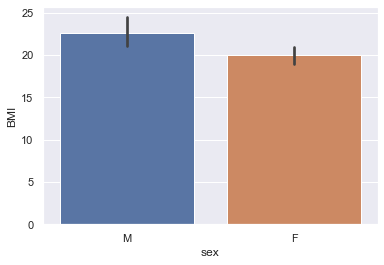

In [7]:
sns.barplot(data = data2, x='sex', y='BMI')

### 2-1. 위와 같이 sns.barplot을 이용해 남성과 여성의 BMI 평균값을 막대그래프로 표시하였다. 남성과 여성 표본에서 95% 신뢰구간을 t분포에 기반해 계산하고, 그래프의 오차막대와 일치하는지 확인하라.

In [8]:
male_t = stats.t.interval(alpha = 0.95, df = 9, loc = data2[data2.sex == 'M']['BMI'].mean(), scale = data2[data2.sex == 'M']['BMI'].std() / np.sqrt(10))
female_t = stats.t.interval(alpha = 0.95, df = 9, loc = data2[data2.sex == 'F']['BMI'].mean(), scale = data2[data2.sex == 'F']['BMI'].std() / np.sqrt(10))
print(male_t,female_t)

(20.48675020141657, 24.669606478583432) (18.74829845522605, 21.248999840773955)


### 2-2. 대응표본 t검정과 독립표본 t검정을 사용해 남성과 여성의 BMI 평균이 다른지 검정하라 (두 p값을 비교해보라).
이 경우, 대응표본 t검정과 독립표본 t검정 중 어느 방법이 더 적절한가? 왜 그러한지 설명하시오.

In [9]:
#대응표본 t검정
male = data2.query(
    'sex == "M"')["BMI"]
female = data2.query(
    'sex == "F"')["BMI"]
male = np.array(male)
female = np.array(female)
diff = male - female 
diff
stats.ttest_rel(male, female)

Ttest_relResult(statistic=2.1839532152377092, pvalue=0.05680736151004805)

In [10]:
#독립표본 t검정
male_m = np.mean(male)
female_m = np.mean(female)

male_sig = np.var(male, ddof = 1)
female_sig = np.var(female, ddof = 1)

male_l = len(male)
female_l = len(female)

t_value = (male_m - female_m) / \
    np.sqrt((male_sig/male_l + female_sig/ female_l))
stats.ttest_ind(male, female, equal_var = False)

Ttest_indResult(statistic=2.394767153966043, pvalue=0.03042517147864766)

In [11]:
#성별을 기준으로 두 그룹으로 나누어 BMI평균을 구한 것이기 때문에 독립표본 t검정을 
#이용하는 것이 더 적절하다 ( 임의의 두 그룹으로 나누어 처리함)
#대응표본 t검정은 비슷한 대상을 짝지어 처리를 하였을 때 사용하는 것이 적절하다 

---

## 3. 분할표 검정 및 시각화

In [12]:
data3 = data[data.age<=20]    # 만 19~20세 남녀.

In [13]:
data3

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
163,A906023903,F,20,166.2,57.5,70.0,20.816409,91
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95
197,A907023103,F,20,164.0,57.4,73.2,21.341463,84
256,A908029803,F,20,157.2,52.7,68.3,21.325810,89
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89
...,...,...,...,...,...,...,...,...
5511,O905024003,F,19,164.9,52.9,67.2,19.454244,88
5550,O906025503,M,19,173.4,78.4,83.7,26.074613,97
5627,O908030303,M,20,177.0,88.5,89.8,28.248588,87
5652,O909028301,M,20,180.4,81.3,79.2,24.981441,92


### 3-1. BMI 25 이상인 사람은 '비만', BMI 23 미만은 '정상'으로 분류한 뒤, 성별에 따라 비만 빈도를 표시하는 분할표(교차표)를 생성하라. 또한 남성, 여성 각각에서 비만의 비율을 구하라.
힌트: ?pd.crosstab 도움말에서 normalize 옵션을 참고하시오.

In [17]:
condition_list = [(data3.BMI >=25), 
                  (data3.BMI < 25) & (data3.BMI >= 23), 
                  (data3.BMI < 23) ]
choice_list = [ '비만', '과체중', '정상' ]
data3['obesity'] = np.select(condition_list, choice_list, default = 'NaN')
pd.crosstab(data3.sex, data3.obesity)

<ipython-input-17-8ad5ca3c83a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['obesity'] = np.select(condition_list, choice_list, default = 'NaN')


obesity,과체중,비만,정상
sex,,,
F,7,7,47
M,4,11,35


In [37]:
pd.crosstab(data3.sex, data3.obesity, normalize = 'index')

obesity,과체중,비만,정상
sex,,,
F,0.114754,0.114754,0.770492
M,0.080000,0.220000,0.700000


### 3-2. 분할표 검정(카이제곱 검정)을 시행해 성별에 따라 과체중의 빈도가 다른지 p값을 구하시오.

In [40]:
cross = pd.crosstab(data3.sex, data3.obesity)
sp.stats.chi2_contingency(cross, correction = False)

(2.396614445131038,
 0.3017044984564451,
 2,
 array([[ 6.045,  9.892, 45.063],
        [ 4.955,  8.108, 36.937]]))

### 3-3. 위의 분할표에서 관찰된 샘플 수가 모두 2배가 된다면, 분할표 검정 결과는 어떻게 되는가?

In [41]:
cross_2 = cross * 2
sp.stats.chi2_contingency(cross_2, correction = False)

(4.793228890262076,
 0.09102560438885503,
 2,
 array([[12.09 , 19.784, 90.126],
        [ 9.91 , 16.216, 73.874]]))